# Three Schemes for Price Simulation




The stochastic partial differential equation (PDE) is described by  
\begin{equation}
    dS = f(S, t)dt + g(S,t)dX
\end{equation}
where $f(S, t)dt   $  is the drift term, $g(S,t)dX$ is the diffusion term.  

As a special form of PDE, the Geometric Brownian Motion (GMB) is commonly used to define the prices of financial assets, including stock prices. Its form is 
\begin{equation}
    dS = \mu Sdt + \sigma S dX
\end{equation}
where $\mu$ is the average growth rate of the asset, $\sigma$ is the standard deviation of the returns, and $dX$ is an increment of a Brownian Motion that  $ dX  \sim  N (0, dt)$.  

Suppose a formula $V(S)$. According to the Taylor series,
\begin{equation}
    dV =  V(S+dS) - V(S)   = \frac{dV}{dS} + \frac{1}{2} \frac{d^2V}{dS^2} d S^2 
\end{equation}
Considering that $dt^2$ and $dt^{\frac{3}{2}}$ can be approximated as zero, so in the above equation,
\begin{equation}
    dS^2 = \mu^2 S^2 dt^2 + 2\mu \sigma S^2 dt dX + \sigma^2 S^2 dt = \sigma^2 S^2 dt
\end{equation}
Substituting to above equations, we get
\begin{equation}
    dV =  \left( \mu S \frac{dV}{dS} + \frac{1}{2} \sigma^2 S^2 \frac{d^2V}{dS^2}   \right)dt + \left(  \sigma S \frac{dV}{dS} \right) dX
\end{equation}
Then define $V(S)$ as $ \log S $, and get $\frac{dV}{dS} = \frac{1}{S}$ and $\frac{d^2V}{dS^2} =  -\frac{1}{S^2}$.

At this point,
\begin{equation}
    dV =  d(\log S)  = \left( \mu - \frac{1}{2} \sigma^2 \right) dt + \sigma dX
\end{equation}
Treating both $\mu$ and $\sigma$ as constants, integrating the above equation in both sides between 0 and t,
\begin{equation}
\int_{0}^{t}   d(\log S)   = \int_{0}^{t} \left( \mu - \frac{1}{2} \sigma^2 \right) d \tau +   \int_{0}^{t}  \sigma dX
\end{equation}

\begin{equation}
    \log\left(  \frac{S(t)}{S(0)} \right)  =   \left( \mu - \frac{1}{2} \sigma^2 \right)t + \sigma(X(t) - X(0))
\end{equation}
Assuming $ X(0) = 0$ and $  S(0)  = S_0$,
\begin{equation}
     S(t)   =  S_0 \exp \left(  \left( \mu - \frac{1}{2} \sigma^2 \right)t + \sigma X(t)    \right)
\end{equation}
In the above equation, $X(t) \sim  N (0, t)$   can also be written as $ \phi \sqrt{t}, \phi  \sim  N (0, 1)$.  

Thus, by knowing the $S_0, \mu,\sigma$ of a particular asset, we can simulate the price after a time interval $T$ like
\begin{equation}
   S_T  =   S_0 \exp \left(  \left( \mu - \frac{1}{2} \sigma^2 \right)T + \sigma \phi \sqrt{T}  \right)
\end{equation}
    
We can use this equation to  simulate the path of asset prices. First, the time interval $[0,T]$ is divided into $N$ segments to generate the increments $\sigma \phi \sqrt{\delta t}$. Then the path of the  $\sigma \phi \sqrt{T}$ is obtained based on the accumulation, which in turn leads to the simulated price at each time by Equation (10). This is the  **closed form solution** for simulating the underlying asset price.    
 
Rewrite the integral of GMB in the following form:
\begin{equation}
     S(t_{n+1})  - S(t_n) = \mu \int_{t_n}^{t_{n+1}} S(\tau) d \tau +  \sigma  \int_{t_n}^{t_{n+1}} S(\tau) dX
\end{equation}

     
In order to implement the simulation of asset prices, we need to transform the above SDE into discretized process. According to what was taught in the course, if we keep only Ito's stochastic Taylor series for the first order terms, the process can be written:
\begin{equation}
    S_{t+\delta t} - S_t  = \mu S_t \delta t + \sigma S_t \phi \sqrt{\delta t} 
\end{equation}

\begin{equation}
    S_{t+\delta t}  =  S_t  ( 1+ \mu \delta t + \sigma  \phi \sqrt{\delta t} )
\end{equation}
We can perform the simulation of asset prices by using this equation. The simulated path of asset prices can be obtained by dividing the time interval $[0,T]$ into $N$ segments, then simulating the $\sigma \phi \sqrt{\delta t}$  and calculating $S_{t=\frac{T}{N}}, S_{t=\frac{2T}{N}}, S_{t=\frac{3T}{N}}, \cdots,  S_{t=T}$ step by step in time. This is the **Euler-Maruyama scheme** for simulating the underlying asset price. 
 
    
Continuing the analytical process above, if we keep the Ito's stochastic Taylor series for the second order, the process can be written as
\begin{equation}
    S_{t+\delta t}  =  S_t \left( 1+ \mu \delta t + \sigma  \phi \sqrt{\delta t} + \frac{1}{2} \sigma^2 ( \phi^2  - 1) \delta t\right)
\end{equation}
The above is **Milstein scheme**. The process of simulating specific assets is consistent with the Euler-Maruyama scheme.  Theoretically, the approximation results of the Milstein scheme are more accurate than the Euler-Maruyama scheme.


## Stock price simulation based on Euler-Maruyama scheme
According to the introduction of Section A, the code for simulating asset prices with the Euler-Maruyama scheme is as follows.

In [548]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Plot settings
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.linewidth'] = 2.0

# Set max row to 300
pd.set_option('display.max_rows', 300)

In [549]:
# define simulation function
def simulate_path_EM(s0, mu, sigma, horizon, timesteps, n_sims):

    # set the random seed for reproducibility
    np.random.seed(10000)

    # read parameters
    S0 = s0                 # initial spot price
    r = mu                  # mu = rf in risk neutral framework
    T = horizon             # time horizon
    t = timesteps           # number of time steps
    n = n_sims              # number of simulation

    # define dt
    dt = T/t                # length of time interval

    # simulate 'n' asset price path with 't' timesteps
    S = np.zeros((t,n))
    S[0] = S0

    for i in range(0, t-1):
        w = np.random.standard_normal(n)
        S[i+1] = S[i] * (1 + r*dt + sigma*np.sqrt(dt)*w)

    return S

price_path_EM = pd.DataFrame(simulate_path_EM(100,0.05,0.2,1,252,100000))
price_path_EM.head()

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,98.418418,100.241753,99.646644,100.431733,98.793448,100.306692,98.987585,100.154929,101.248576,100.123119,...,98.199306,99.273697,100.861574,100.608802,99.889286,100.399692,99.253621,100.017423,99.546090,99.928775
2,97.059840,99.718764,97.625289,98.664249,97.588799,99.868672,100.144207,100.041077,100.528840,100.567618,...,98.259657,97.330875,101.166749,101.612757,99.910821,99.612112,97.815591,99.076714,101.471622,101.169515
3,96.822574,99.446217,98.861932,99.065891,98.013727,99.621067,101.820743,99.702732,101.159791,101.080116,...,97.504493,98.927967,101.109704,101.887146,98.467048,99.512998,97.371720,98.665132,100.631808,99.590082
4,97.419162,101.562887,98.381210,97.925548,96.842145,99.704038,103.348445,99.092866,99.046141,99.187749,...,99.989425,99.596557,102.691579,101.425596,101.190148,102.112313,95.802690,99.471950,101.898709,96.285364


With the above code, 100,000 paths are generated, 1000 of these paths are shown below.  

Text(0.5, 1.0, 'Monte Carlo Simulated Asset Prices')

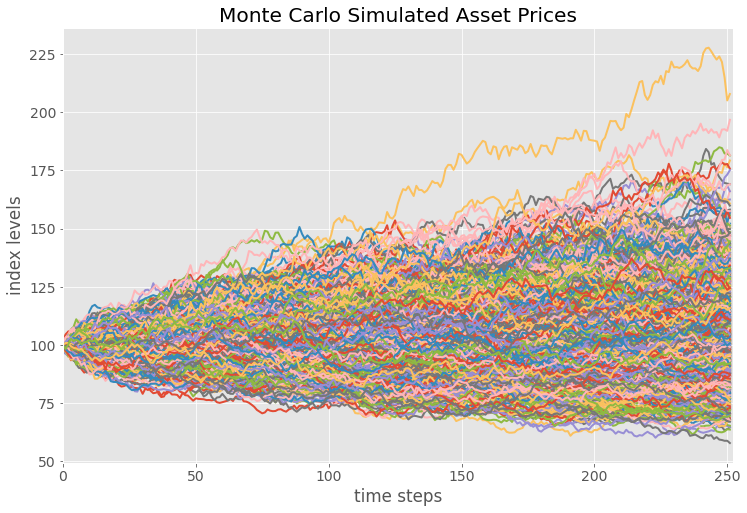

In [550]:
# Plot initial 100 simulated path using matplotlib
plt.plot(price_path_EM.iloc[:,:1000])
plt.xlabel('time steps')
plt.xlim(0,252)
plt.ylabel('index levels')
plt.title('Monte Carlo Simulated Asset Prices') 

## Stock price simulation based on Milstein scheme 

According to the introduction of Section A, the codes for simulating asset prices with the  Milstein scheme  is as follows.

In [560]:
# define simulation function
def simulate_path_Milstein(s0, mu, sigma, horizon, timesteps, n_sims):

    # set the random seed for reproducibility
    np.random.seed(10000)

    # read parameters
    S0 = s0                 # initial spot price
    r = mu                  # mu = rf in risk neutral framework
    T = horizon             # time horizon
    t = timesteps           # number of time steps
    n = n_sims              # number of simulation

    # define dt
    dt = T/t                # length of time interval

    # simulate 'n' asset price path with 't' timesteps
    S = np.zeros((t,n))
    S[0] = S0

    for i in range(0, t-1):
        w = np.random.standard_normal(n)
        S[i+1] = S[i] * (1 + r*dt + sigma*np.sqrt(dt)*w + 0.5*(sigma**2)*(w**2-1)*dt)

    return S

price_path_Milstein = pd.DataFrame(simulate_path_Milstein(100,0.05,0.2,1,252,100000))
price_path_Milstein.head()

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,98.423304,100.234063,99.639404,100.424645,98.793032,100.299167,98.984976,100.147084,101.248188,100.115235,...,98.207941,99.268544,100.857180,100.602600,99.881434,100.392477,99.248620,100.009486,99.539276,99.920880
2,97.066497,99.704629,97.631191,98.665219,97.588133,99.854264,100.140241,100.025382,100.523123,100.552655,...,98.260512,97.337342,101.154740,101.603320,99.895041,99.600232,97.813490,99.065527,101.475018,101.161049
3,96.821850,99.424636,98.867749,99.059775,98.006155,99.599128,101.822466,99.679793,101.147917,101.058302,...,97.500597,98.939604,101.089703,101.869938,98.454286,99.493297,97.362962,98.647068,100.630766,99.586363
4,97.412470,101.555059,98.380419,97.918432,96.834121,99.674197,103.353273,99.064144,99.048987,99.176410,...,100.008863,99.602549,102.675302,101.401520,101.206330,102.117628,95.799300,99.449049,101.897393,96.329351


With the above codes, 100,000 paths are generated, 1000 of these paths are shown below.

Text(0.5, 1.0, 'Monte Carlo Simulated Asset Prices')

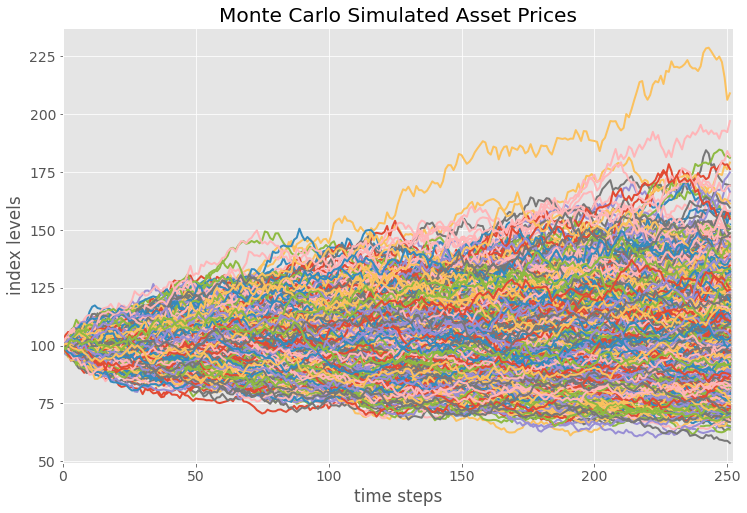

In [561]:
# Plot initial 100 simulated path using matplotlib
plt.plot(price_path_Milstein.iloc[:,:1000])
plt.xlabel('time steps')
plt.xlim(0,252)
plt.ylabel('index levels')
plt.title('Monte Carlo Simulated Asset Prices') 

In order to compare the results of Milstein scheme and Euler-Maruyama scheme,  choose the same
paths generated in both schemes for comparison. It turns out that the difference between the results
under the two schemes is very small.


Text(0.5, 1.0, 'Monte Carlo Simulated Asset Prices')

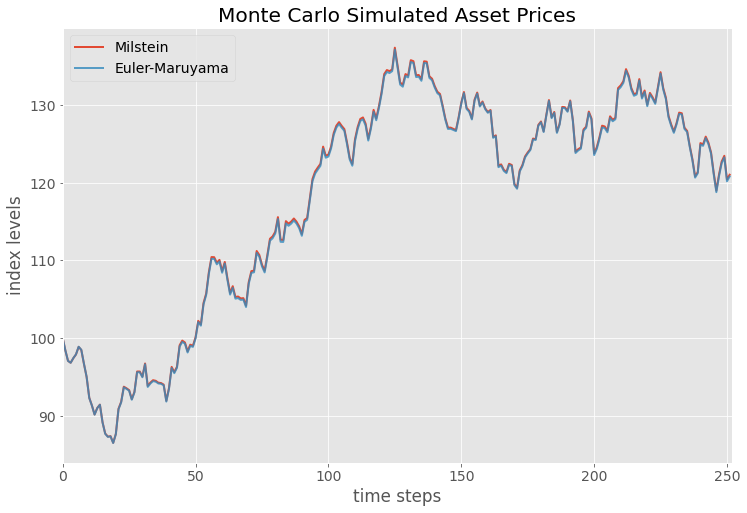

In [262]:
# Plot initial 100 simulated path using matplotlib
plt.plot(price_path_Milstein.iloc[:,0],label = 'Milstein')
plt.plot(price_path_EM.iloc[:,0], alpha=0.8,   label = 'Euler-Maruyama')
plt.xlabel('time steps')
plt.xlim(0,252)
plt.ylabel('index levels')
plt.legend(loc='best' )
plt.title('Monte Carlo Simulated Asset Prices') 

## Stock price simulation based on closed form solution 


According to the introduction of Section A, the codes for simulating asset prices based on  closed form solution  is as follows.

In [566]:
# define simulation function
def simulate_path_closed_form(s0, mu, sigma, horizon, timesteps, n_sims):

    # set the random seed for reproducibility
    np.random.seed(10000)

    # read parameters
    S0 = s0                 # initial spot price
    r = mu                  # mu = rf in risk neutral framework
    T = horizon             # time horizon
    t = timesteps           # number of time steps
    n = n_sims              # number of simulation

    # define dt
    dt = T/t                # length of time interval

    # simulate 'n' asset price path with 't' timesteps
    S = np.zeros((t,n))
    S[0] = S0
    w_cum = []

    for i in range(0, t-1):
        w = np.random.standard_normal(n)
        w_cum.append(w)
    w_cum= np.cumsum(w_cum, axis =0)
    for i in range(0, t-1):
        S[i+1] = S[0] * np.exp((r - 0.5*sigma**2)*(dt*(i+1)) + sigma*np.sqrt(dt)*w_cum[i])
    return S

price_path_closed_form = pd.DataFrame(simulate_path_closed_form(100,0.05,0.2,1,252,100000))
price_path_closed_form.head()

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,98.423047,100.234090,99.639359,100.424696,98.792857,100.299203,98.984836,100.147101,101.248367,100.115249,...,98.207627,99.268449,100.857291,100.602674,99.881419,100.392524,99.248523,100.009487,99.539218,99.920870
2,97.066036,99.704590,97.630766,98.664965,97.587785,99.854244,100.140261,100.025383,100.523207,100.552721,...,98.260203,97.336891,101.154887,101.603530,99.895027,99.600175,97.813170,99.065399,101.475306,101.161217
3,96.821361,99.424562,98.867497,99.059567,98.005856,99.599077,101.822762,99.679752,101.148079,101.058430,...,97.500191,98.939406,101.089841,101.870180,98.454048,99.493226,97.362588,98.646889,100.630940,99.586273
4,97.412051,101.555393,98.380107,97.918063,96.833656,99.674154,103.353810,99.064025,99.048737,99.176197,...,100.009009,99.602432,102.675693,101.401701,101.206754,102.118158,95.798674,99.448972,101.897752,96.328263


With the above codes,  100,000 paths are generated, 1000 of these paths are shown below.  

Text(0.5, 1.0, 'Monte Carlo Simulated Asset Prices')

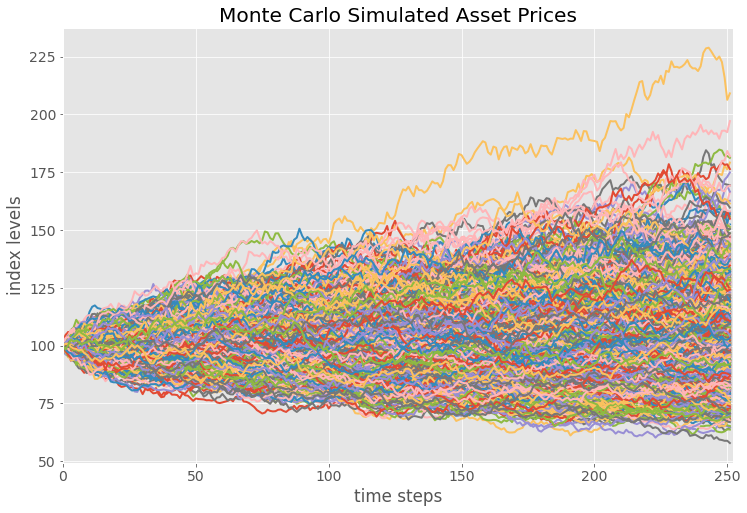

In [567]:
# Plot initial 100 simulated path using matplotlib
plt.plot(price_path_closed_form.iloc[:,:1000])
plt.xlabel('time steps')
plt.xlim(0,252)
plt.ylabel('index levels')
plt.title('Monte Carlo Simulated Asset Prices') 

In order to compare the results of Milstein scheme, Euler-Maruyama scheme and the closed form solution, we can choose the same paths generated in the three schemes for comparison. It was found that the differences in the results under all three schemes were very small.

Text(0.5, 1.0, 'Monte Carlo Simulated Asset Prices')

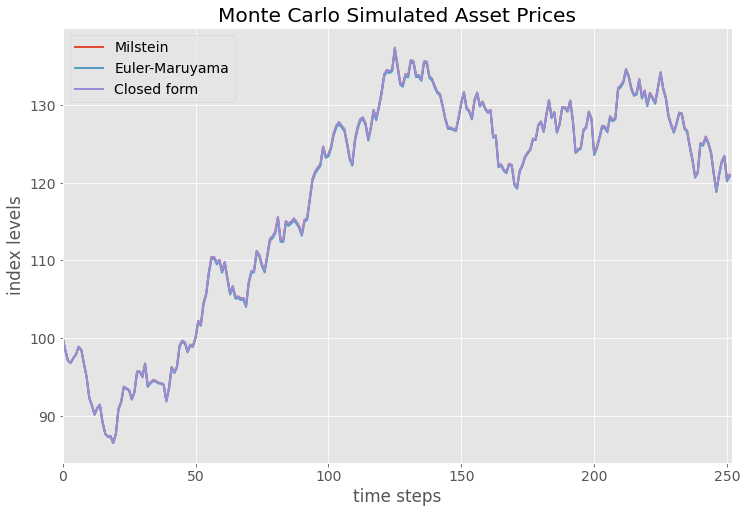

In [590]:
# Plot initial 100 simulated path using matplotlib
plt.plot(price_path_Milstein.iloc[:,0],label = 'Milstein')
plt.plot(price_path_EM.iloc[:,0], alpha=0.8,   label = 'Euler-Maruyama')
plt.plot(price_path_closed_form.iloc[:,0],     label = 'Closed form')
plt.xlabel('time steps')
plt.xlim(0,252)
plt.ylabel('index levels')
plt.legend(loc='best' )
plt.title('Monte Carlo Simulated Asset Prices') 

When taking out the last 10 days of data separately, the simulation results of the Milstein scheme have almost completely overlapped with those of the closed form solution, with only very slight differences. Thus, the accuracy of the simulation has been improved by keeping the second order term. In contrast, there are still observable differences in the Euler-Maruyama scheme.

Text(0.5, 1.0, 'Monte Carlo Simulated Asset Prices')

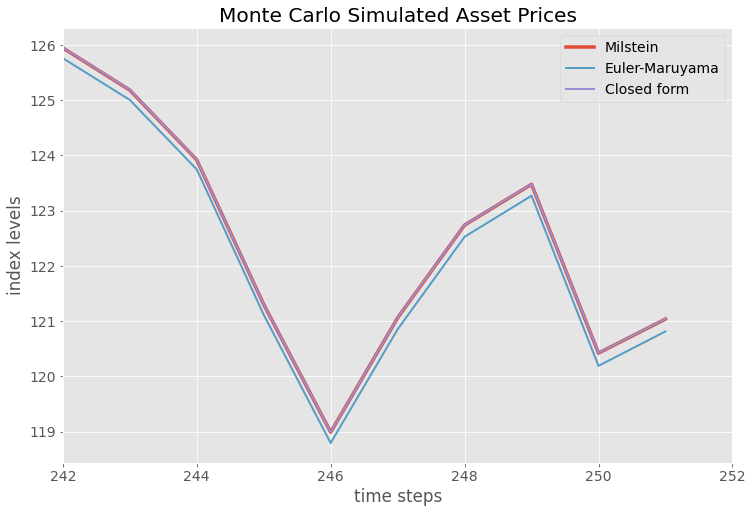

In [599]:
# Plot initial 100 simulated path using matplotlib
plt.plot(price_path_Milstein.iloc[-10:,0],linewidth=3.5, label = 'Milstein')
plt.plot(price_path_EM.iloc[-10:,0], alpha=0.8, linewidth=2,label = 'Euler-Maruyama')
plt.plot(price_path_closed_form.iloc[-10:,0],  linewidth=2, label = 'Closed form')
plt.xlabel('time steps')
plt.xlim(242,252)
plt.ylabel('index levels')
plt.legend(loc='best' )
plt.title('Monte Carlo Simulated Asset Prices') 